# Import Required Libraries and excel file

In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [65]:
df=pd.read_excel("Telco_customer_churn.xlsx",sheet_name="Telco_Churn")

# Gaining Basic Understanding about the data

In [66]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [68]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [69]:
#total charges is object type but it should be  numerical
print("Type of total charges column is:",df["Total Charges"].dtype)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
print("Type of total charges column is:",df["Total Charges"].dtype)

Type of total charges column is: object
Type of total charges column is: float64


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

## Analyzing Null Values

In [71]:
df['Churn Reason'].isnull().sum()*100/df["Churn Reason"].size
#those who have chrurn label no are using the telco product they don't have any reason to leave
#more then half is missing here so we can drop this column but we will use it to visualize the main resons for leaving
#total 74.46% data of this column is missing

np.float64(73.46301292063042)

In [72]:
df['Churn Label'].value_counts(normalize=True)*100
#This is same as the previous every "No" labeled data here has missing Churn Reason

Churn Label
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [73]:
df[df['Total Charges'].isna()]
#11 missing values

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


In [74]:
df['Total Charges'].fillna(df['Monthly Charges'] * df['Tenure Months'], inplace=True)
#Apply Total Charges=Monthly Charges * Tenure Months formula to calculate the missing values

In [75]:
df.nunique()
#Number of unique occuerences accross all columns

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [76]:
df.groupby(['Country','State']).size()
#everybody is from US california so this columns are not needed

Country        State     
United States  California    7043
dtype: int64

# Data Visualization

### Churn Label Basic Analysis

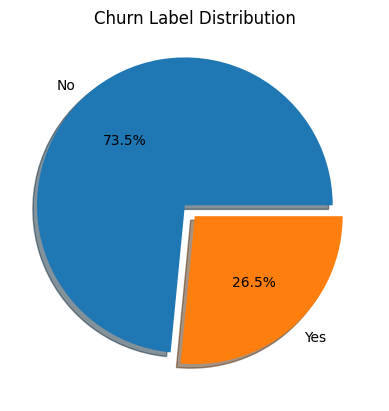

In [77]:
Churn_Label_counts= df['Churn Label'].value_counts()
plt.pie(Churn_Label_counts.values,labels= Churn_Label_counts.keys(),explode=(0.1,0),autopct="%.1f%%",shadow=True)
plt.title('Churn Label Distribution')
plt.show()
#26.5% of customers have stopped using companys service


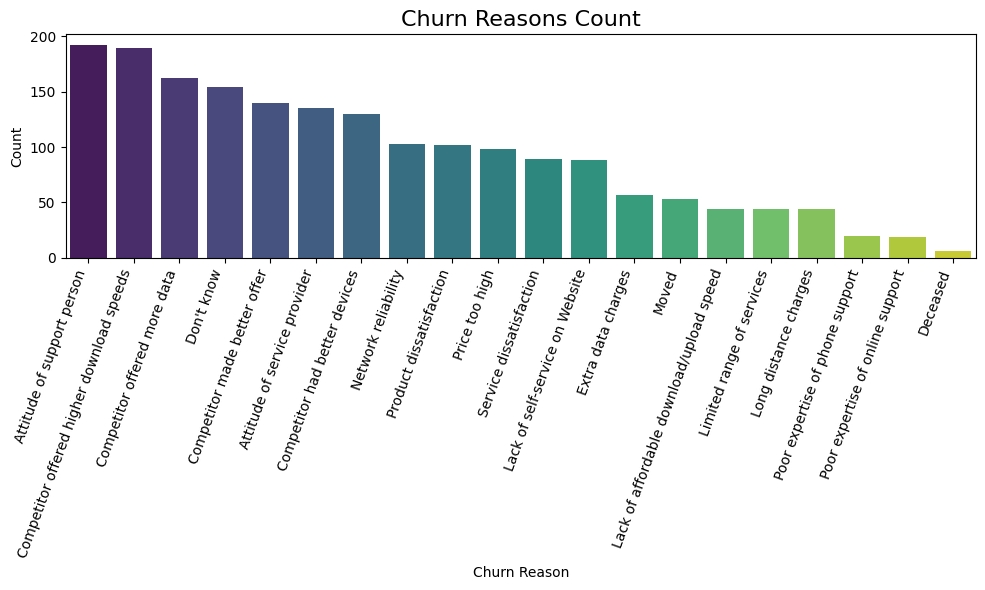

In [78]:
values = df['Churn Reason'].value_counts(ascending=False).values
keys = df['Churn Reason'].value_counts(ascending=False).index
plt.figure(figsize=(10, 6))
sns.barplot(x=keys, y=values, palette="viridis") 
plt.title("Churn Reasons Count", fontsize=16)
plt.xlabel("Churn Reason")
plt.ylabel("Count")
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()
#Main reasons for Churn inefficient support, poor service and Loss to competitor

### City

In [79]:
df['City'].nunique()

1129

In [80]:
# Group by 'City' and 'Churn Label' and count the occurrences
grouped = df.groupby(['City', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('City').transform('sum')
churn_rate = round(grouped / total_counts, 2)
City_ChurnLabel = pd.DataFrame({'churn_rate': churn_rate}).reset_index()
# Create a DataFrame with the total count per city
city_counts = df.groupby('City')['CustomerID'].count().reset_index()
city_counts.rename(columns={'CustomerID': 'count'}, inplace=True)

# Merge the City_ChurnLabel and city_counts DataFrames
City_ChurnLabel = City_ChurnLabel.merge(city_counts, on='City')

# Filter out the rows where 'Churn Label' is 'No' and sort dataframe by count
City_ChurnLabel = City_ChurnLabel[City_ChurnLabel['Churn Label'] == 'Yes']
City_ChurnLabel = City_ChurnLabel.sort_values(by='count', ascending=False)
City_ChurnLabel.drop(columns='Churn Label', inplace=True)
City_ChurnLabel.head()

,City,churn_rate,count
976,Los Angeles,0.30,305
1502,San Diego,0.33,150
1518,San Jose,0.26,112
1479,Sacramento,0.24,108
1508,San Francisco,0.30,104


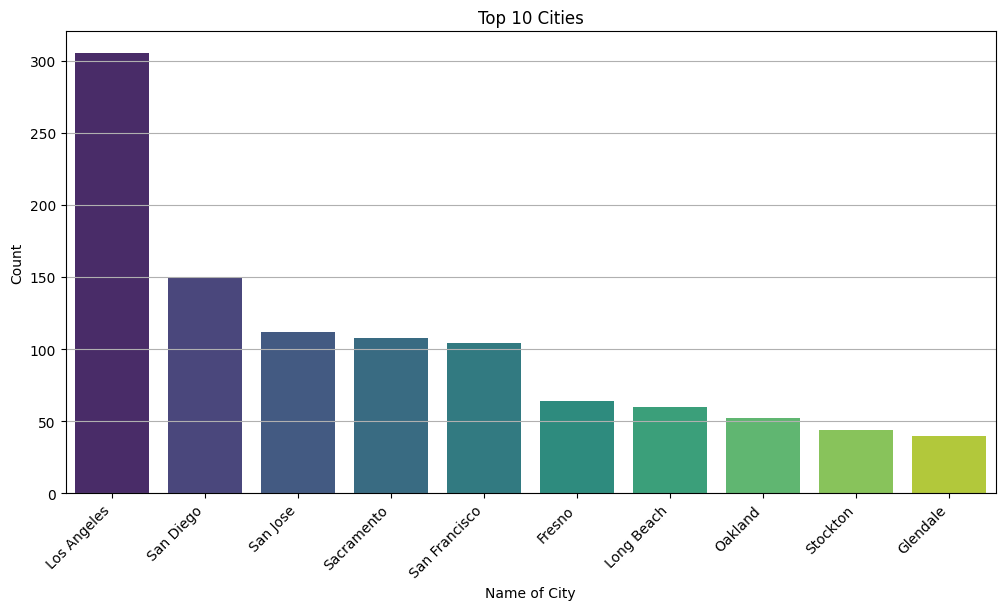

In [81]:
#top 10 cities with highest customers
top_10 = City_ChurnLabel.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='City', y='count', palette='viridis')
plt.title('Top 10 Cities')
plt.xlabel('Name of City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis="y")
plt.show()


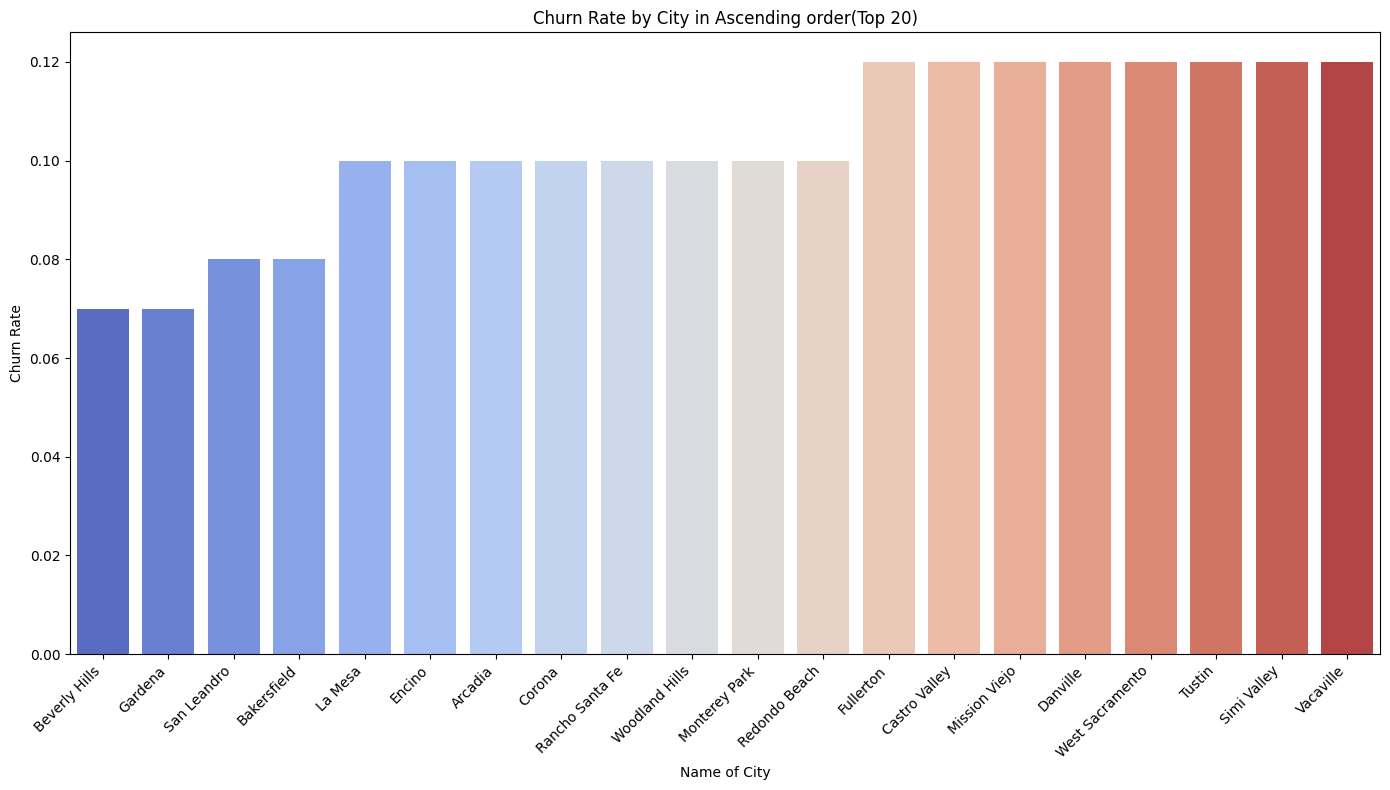

In [82]:
#Churn Rate by City in Ascending order
top_20 = City_ChurnLabel.sort_values(by='churn_rate', ascending=True).head(20)
plt.figure(figsize=(14, 8))
sns.barplot(data=top_20, x='City', y='churn_rate', palette='coolwarm')
plt.title('Churn Rate by City in Ascending order(Top 20)')
plt.xlabel('Name of City')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

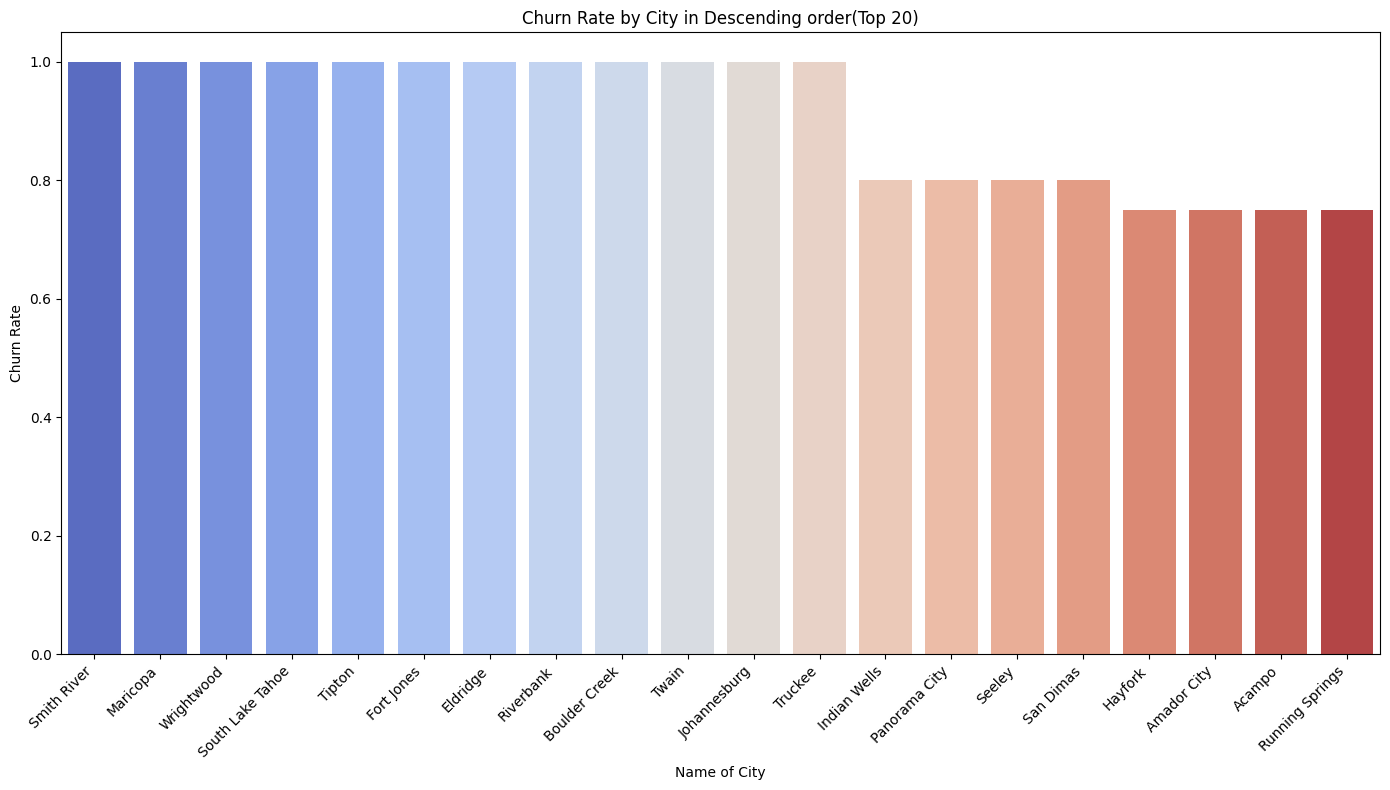

In [83]:
#Churn Rate by City in Descending order
top_20 = City_ChurnLabel.sort_values(by='churn_rate', ascending=False).head(20)
plt.figure(figsize=(14, 8))
sns.barplot(data=top_20, x='City', y='churn_rate', palette='coolwarm')
plt.title('Churn Rate by City in Descending order(Top 20)')
plt.xlabel('Name of City')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

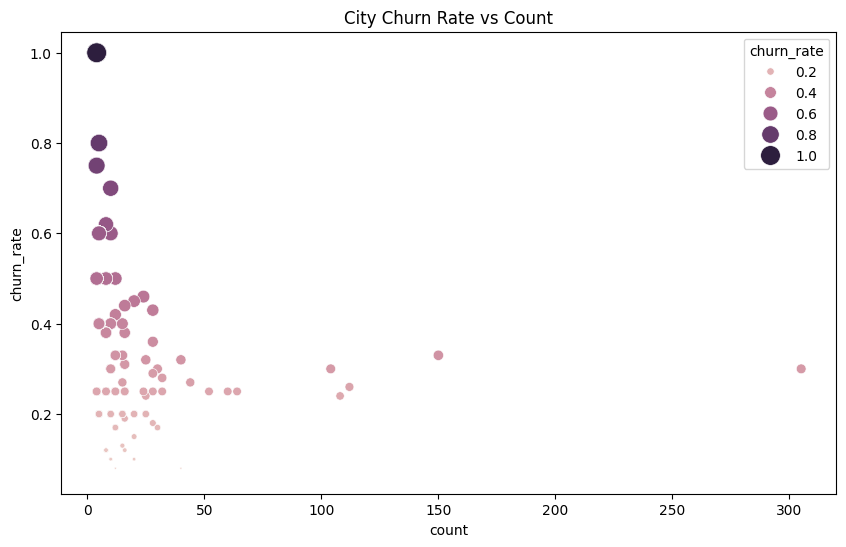

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=City_ChurnLabel,x='count',y='churn_rate',size='churn_rate',hue='churn_rate',sizes=(0, 200)) 
plt.title('City Churn Rate vs Count')
plt.show()
#churn rate over 40% is observed in those who have less number of customers


### Tenure Months

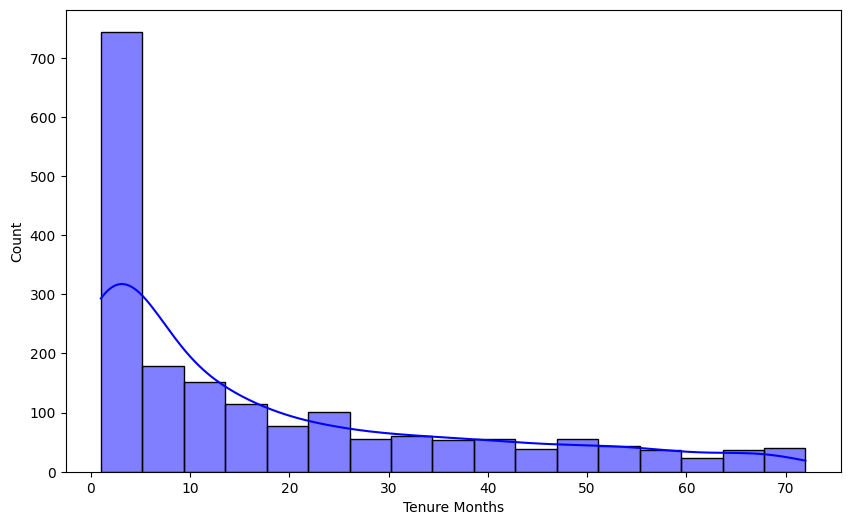

In [85]:
plt.figure(figsize=(10,6))
sns.histplot(data=df[df['Churn Label'] == 'Yes'],x="Tenure Months",kde=True,color='blue')
plt.show()
#After 10 months of time the rapid change in declining curve is reduced and fluctuation reduces



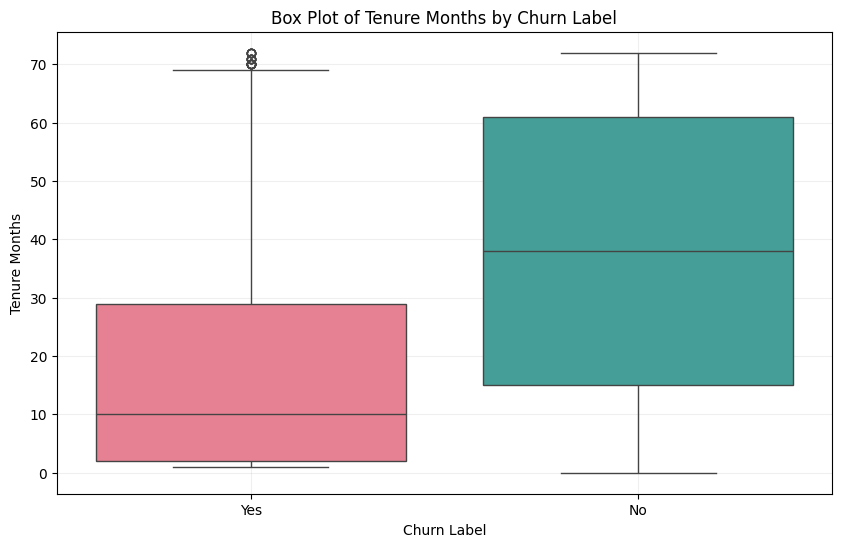

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn Label', y='Tenure Months',palette='husl')
plt.title('Box Plot of Tenure Months by Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Tenure Months')
plt.grid(True, alpha=0.2)
plt.show()
# 50% of the customers who left the service did so in the first 10 months.


### Contract type

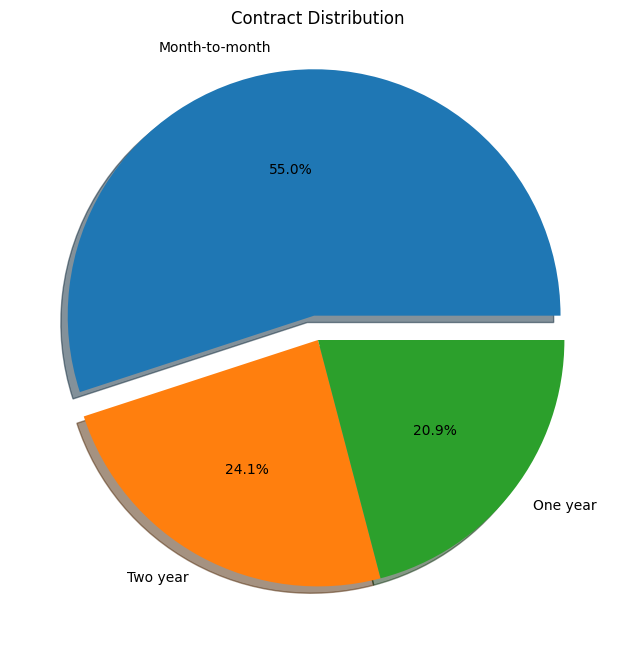

In [87]:
Contract_Label_counts = df['Contract'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(Contract_Label_counts.values, labels=Contract_Label_counts.index, autopct='%.1f%%',explode=(0.1,0,0),shadow=True) 
plt.title('Contract Distribution')
plt.show()
#Most of the people are on month-to-month contract

In [88]:
grouped = df.groupby(['Contract', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('Contract').transform('sum')
normalized_count = round(grouped / total_counts,2)
Contract_ChurnLabel = pd.DataFrame({'normalized_count': normalized_count}).reset_index()
Contract_ChurnLabel

,Contract,Churn Label,normalized_count
0,Month-to-month,No,0.57
1,Month-to-month,Yes,0.43
2,One year,No,0.89
3,One year,Yes,0.11
4,Two year,No,0.97
5,Two year,Yes,0.03


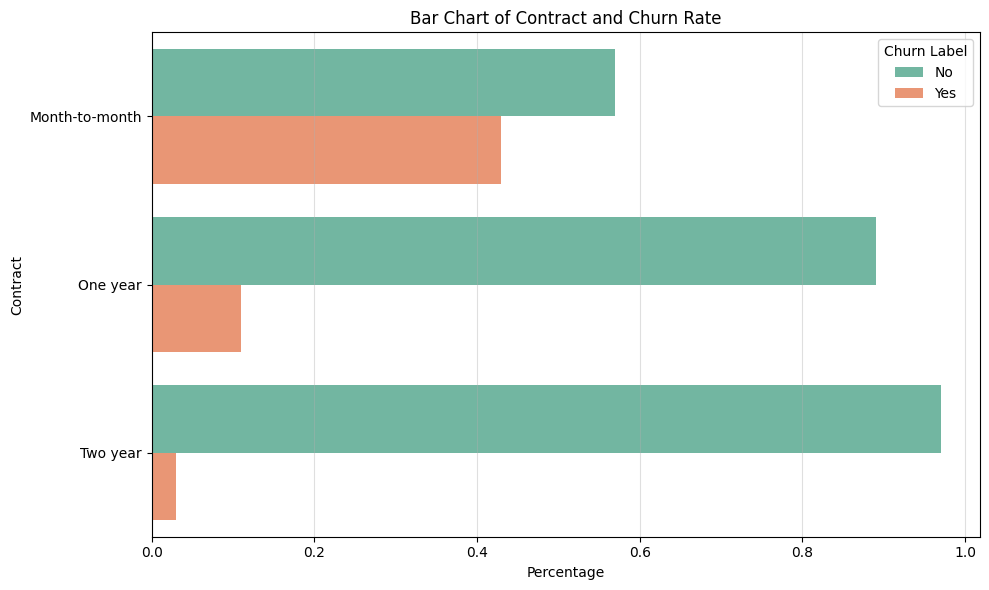

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Contract_ChurnLabel, x='normalized_count',y='Contract', hue='Churn Label',palette='Set2')
plt.title('Bar Chart of Contract and Churn Rate')
plt.xlabel('Percentage')
plt.ylabel('Contract')
plt.legend(title='Churn Label')
plt.grid(axis='x',alpha=0.4)
plt.tight_layout()
plt.show()
#Churn rate is highest for month-to-month contracts at 43%.he churn rate is lower for one-year contracts, at 11%, and even lower for two-year contracts, at 3%.
#so the people with monthly contracts are more likely to churn


### Gender

In [90]:
df['Gender'].value_counts(normalize=True)
#almost balanced

Gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

In [91]:
grouped = df.groupby(['Gender', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('Gender').transform('sum')
normalized_count = round(grouped / total_counts,2)
Gender_ChurnLabel = pd.DataFrame({'rate': normalized_count}).reset_index()
Gender_ChurnLabel

,Gender,Churn Label,rate
0,Female,No,0.73
1,Female,Yes,0.27
2,Male,No,0.74
3,Male,Yes,0.26


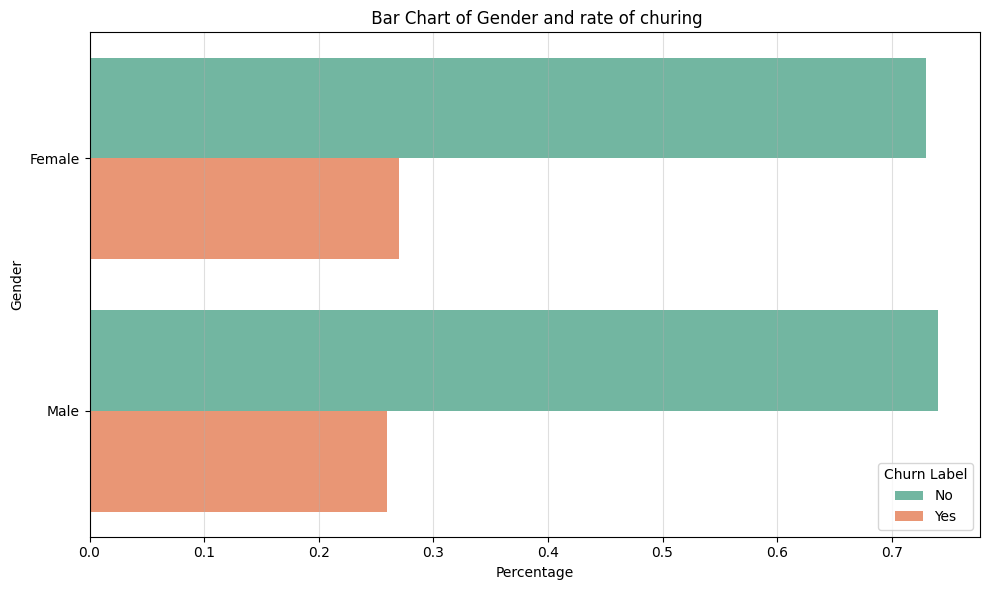

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Gender_ChurnLabel, x='rate',y='Gender', hue='Churn Label',palette='Set2')
plt.title(' Bar Chart of Gender and rate of churing')
plt.xlabel('Percentage')
plt.ylabel('Gender')
plt.legend(title='Churn Label')
plt.grid(axis='x',alpha=0.4)
plt.tight_layout()
plt.show()
#almost same so gender has no significant influence on the churning

### Payment Method


In [93]:
df['Payment Method'].value_counts()

Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

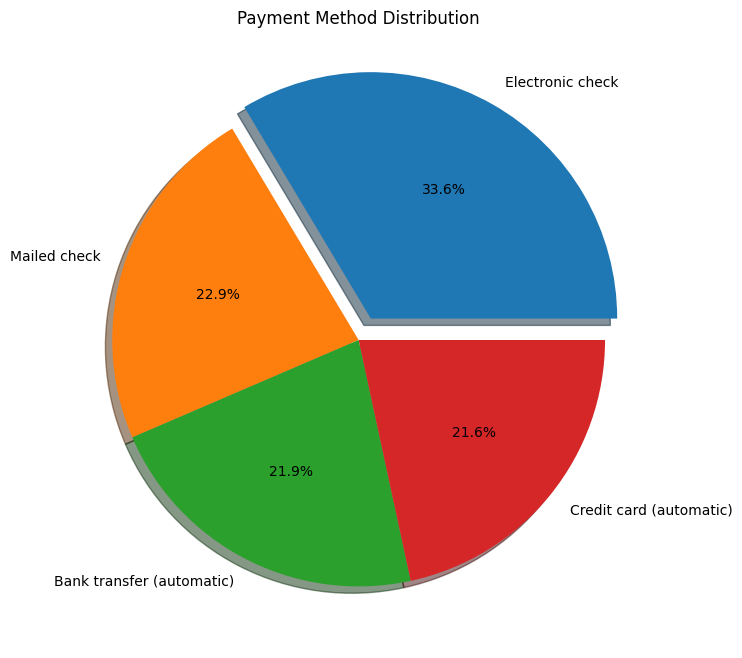

In [94]:
Payment_Method_counts = df['Payment Method'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(Payment_Method_counts.values, labels=Payment_Method_counts.index, autopct='%1.1f%%',shadow=True,explode=(0.1,0,0,0))    
plt.title('Payment Method Distribution')
plt.show()
#Most of customers use electronic check

In [95]:
grouped = df.groupby(['Payment Method', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('Payment Method').transform('sum')
normalized_count = round(grouped / total_counts,2)
Payment_Method_ChurnLabel = pd.DataFrame({'rate': normalized_count}).reset_index()
Payment_Method_ChurnLabel

,Payment Method,Churn Label,rate
0,Bank transfer (automatic),No,0.83
1,Bank transfer (automatic),Yes,0.17
2,Credit card (automatic),No,0.85
3,Credit card (automatic),Yes,0.15
4,Electronic check,No,0.55
5,Electronic check,Yes,0.45
6,Mailed check,No,0.81
7,Mailed check,Yes,0.19


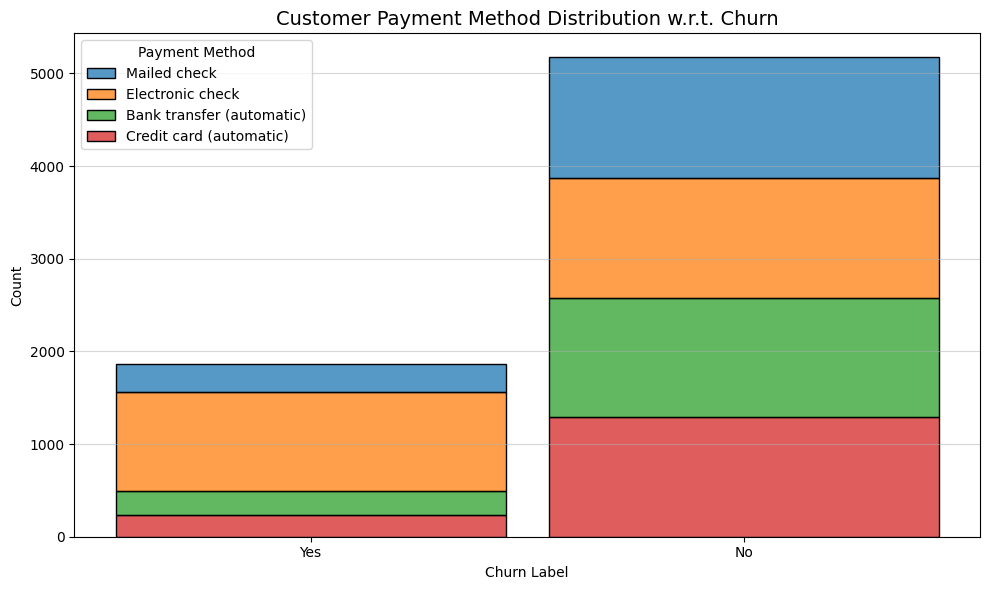

In [96]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Churn Label", hue="Payment Method", multiple="stack", shrink=0.9)
plt.title('Customer Payment Method Distribution w.r.t. Churn', fontsize=14)
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.grid(axis="y",alpha=0.5)
plt.tight_layout()
plt.show()
#Major customers who moved out were having Electronic Check as Payment Method.
#Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

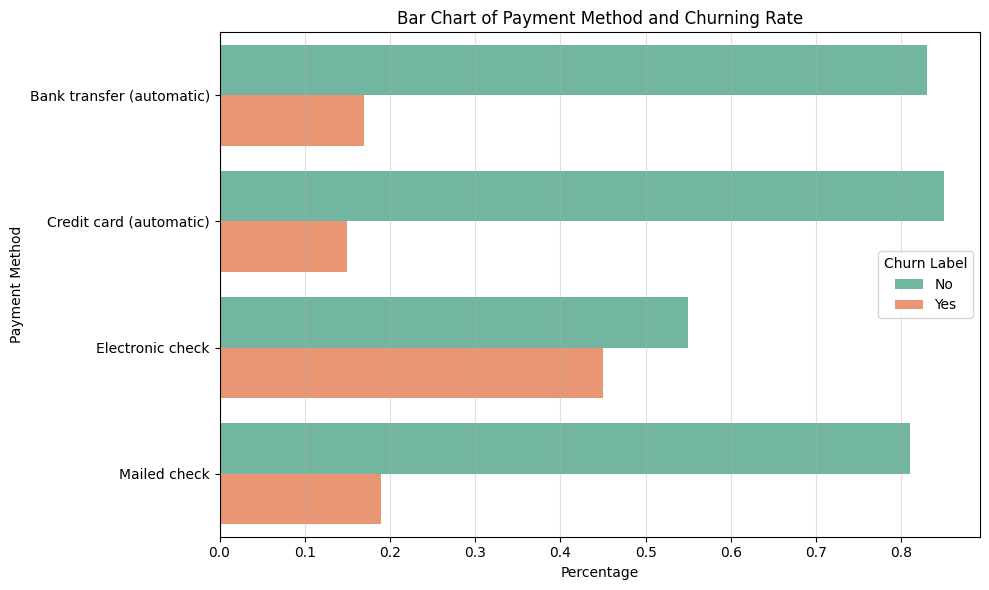

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Payment_Method_ChurnLabel, x='rate',y='Payment Method', hue='Churn Label',palette='Set2')
plt.title('Bar Chart of Payment Method and Churning Rate')
plt.xlabel('Percentage')
plt.ylabel('Payment Method')
plt.legend(title='Churn Label')
plt.grid(axis='x',alpha=0.4)
plt.tight_layout()
plt.show()
#customers with an electronic check as a payment method with 45% churn rate

### Internet Service

In [98]:
grouped = df.groupby(['Internet Service', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('Internet Service').transform('sum')
normalized_count = round(grouped / total_counts,2)
Internet_Service_ChurnLabel = pd.DataFrame({'rate': normalized_count}).reset_index()
Internet_Service_ChurnLabel

,Internet Service,Churn Label,rate
0,DSL,No,0.81
1,DSL,Yes,0.19
2,Fiber optic,No,0.58
3,Fiber optic,Yes,0.42
4,No,No,0.93
5,No,Yes,0.07


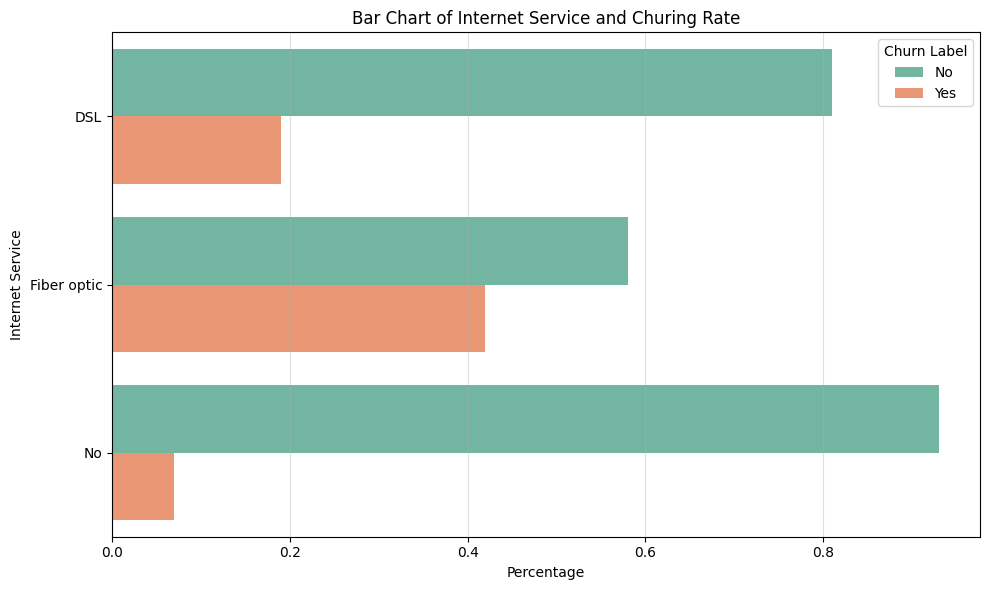

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Internet_Service_ChurnLabel, x='rate',y='Internet Service', hue='Churn Label',palette='Set2')
plt.title('Bar Chart of Internet Service and Churing Rate')
plt.xlabel('Percentage')
plt.ylabel('Internet Service')
plt.legend(title='Churn Label')
plt.grid(axis='x',alpha=0.4)
plt.tight_layout()
plt.show()
#Customers with an fiber optic connection have near 42% churn rate and those who have no connection have the minimum churn rate of 7%

### Total Charges

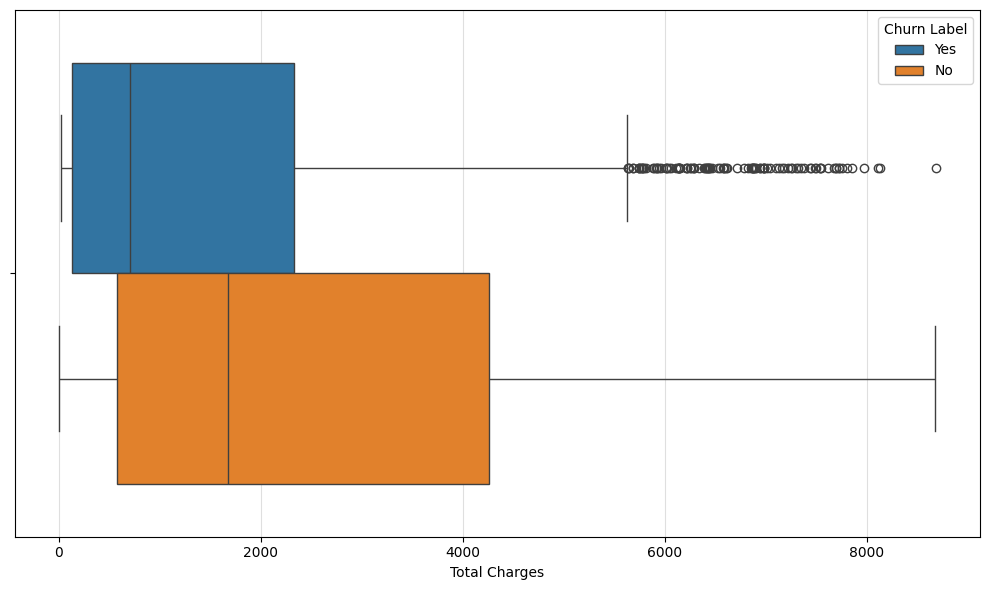

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,x="Total Charges", hue="Churn Label")
plt.grid(axis="x",alpha=0.4)
plt.tight_layout()
plt.show()
#The median charges of churned customers are lower than the median charges of non-churned customers more than 2 times.

### Tech Support

In [101]:
grouped = df.groupby(['Tech Support', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('Tech Support').transform('sum')
normalized_count = round(grouped / total_counts,2)
Tech_Support_ChurnLabel = pd.DataFrame({'rate': normalized_count}).reset_index()
Tech_Support_ChurnLabel

,Tech Support,Churn Label,rate
0,No,No,0.58
1,No,Yes,0.42
2,No internet service,No,0.93
3,No internet service,Yes,0.07
4,Yes,No,0.85
5,Yes,Yes,0.15


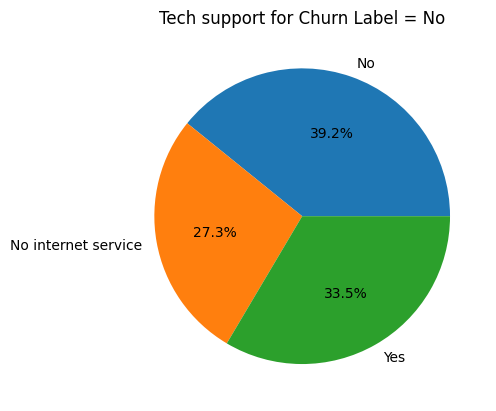

In [102]:
grouped_reset=grouped.reset_index()
no_churn = grouped_reset[grouped_reset['Churn Label'] == 'No']
plt.pie(no_churn['CustomerID'], 
        labels=no_churn['Tech Support'], 
        autopct='%1.1f%%')
plt.title('Tech support for Churn Label = No')
plt.show()

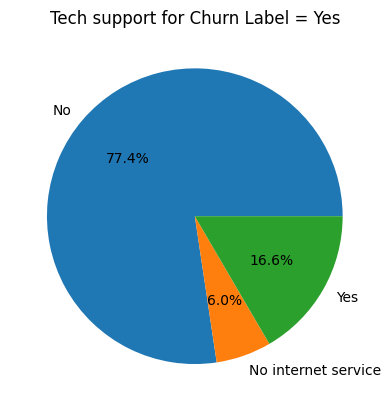

In [103]:
yes_churn = grouped_reset[grouped_reset['Churn Label'] == 'Yes']
plt.pie(yes_churn['CustomerID'],labels=no_churn['Tech Support'],autopct='%1.1f%%')
plt.title('Tech support for Churn Label = Yes')
plt.show()
#77.4% of the customers who left the service did not have the tech support option enabled.

### Dependents, Partners and Senior Citizens

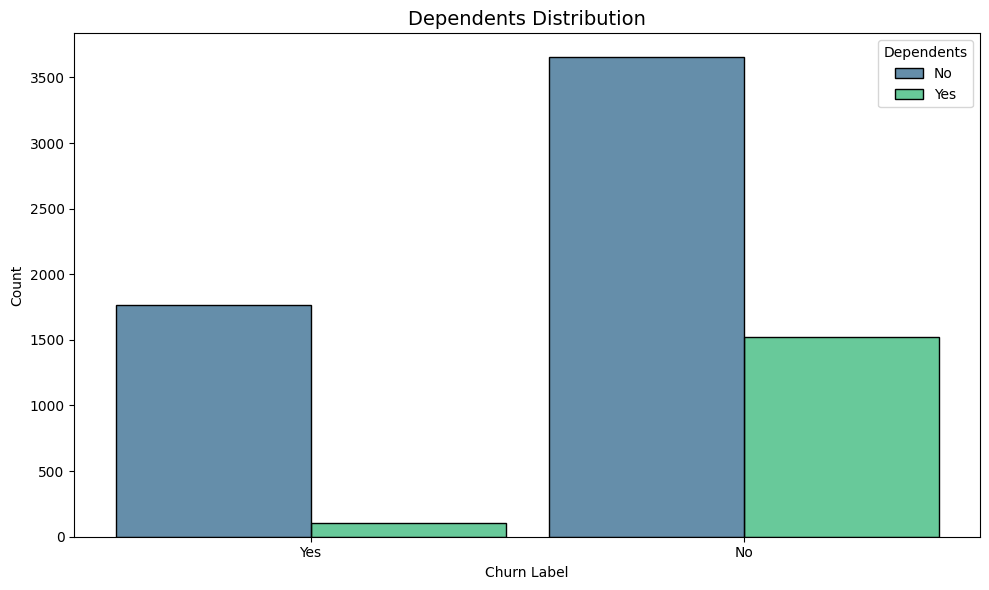

In [104]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Churn Label", hue="Dependents", multiple="dodge", palette="viridis", shrink=0.9)
plt.title('Dependents Distribution', fontsize=14)
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
#Customers without dependents are more likely to churn

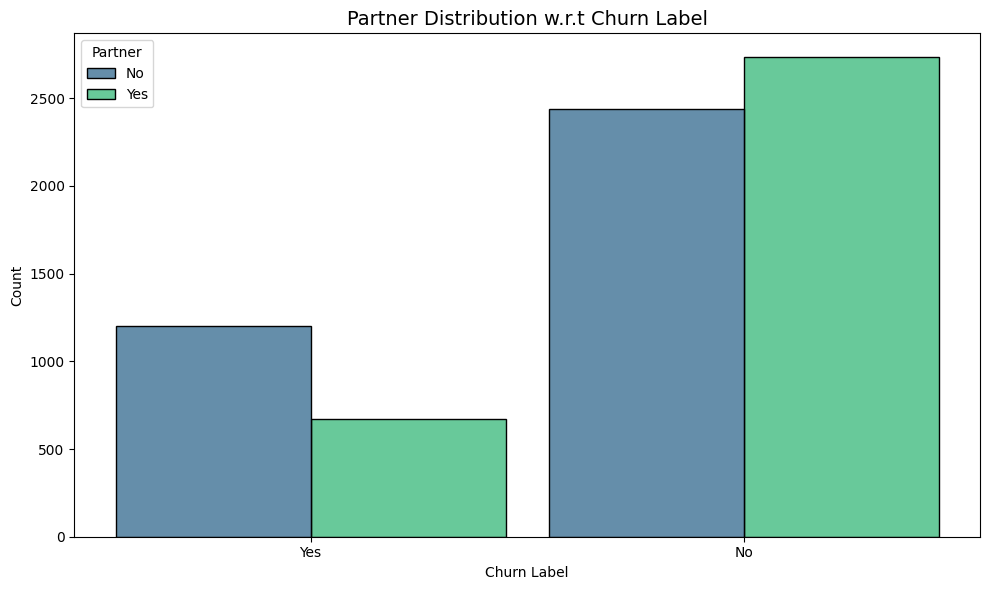

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Churn Label", hue="Partner", multiple="dodge",palette="viridis", shrink=0.9)
plt.title('Partner Distribution w.r.t Churn Label', fontsize=14)
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
#Customers without partners are more likely to churn

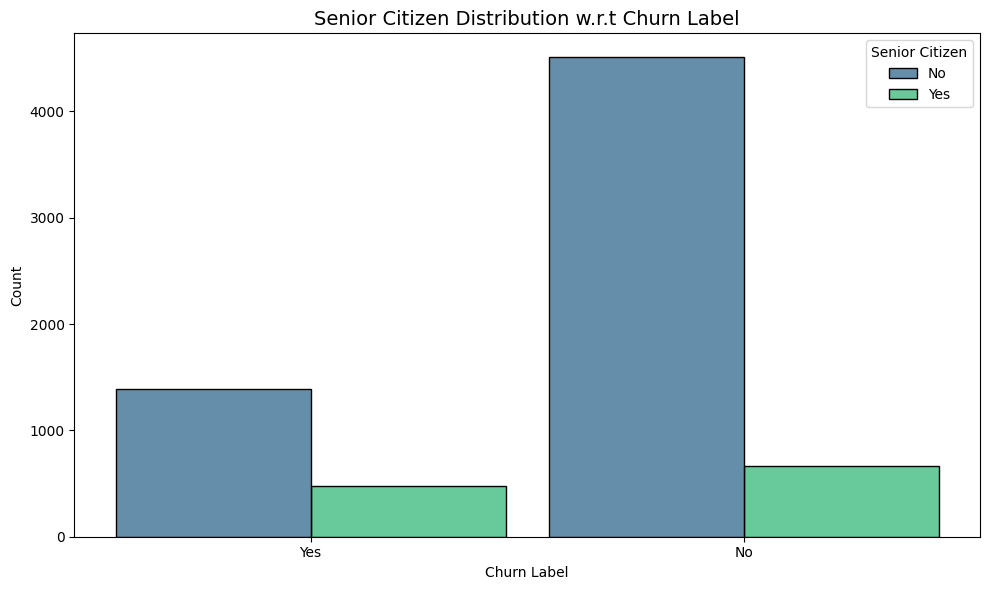

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Churn Label", hue="Senior Citizen", multiple="dodge",palette="viridis", shrink=0.9)
plt.title('Senior Citizen Distribution w.r.t Churn Label', fontsize=14)
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
#fraction of senior citizen is very less
#Senior Citizen Customers are't more likely to churn

### Droping some columns and converting some categoricals to numeric labels for Correlation Heatmap Generation

In [107]:
#1 value or too many unique values or related values are already present
df.drop(['CustomerID','Count','Country','State','Lat Long','Latitude','Longitude','Gender','CLTV','Churn Reason','Churn Value','Churn Score'],axis=1,inplace=True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure Months      7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [109]:
df.nunique()

City                 1129
Zip Code             1652
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
dtype: int64

In [110]:
#Converting Categorical Columns to numeric for correlation analysis
total_rows = len(df)
selected_columns = []
for column in df.columns:
    if len(df[column].unique()) <= total_rows / 10:
        df[column] = df[column].astype('category').cat.codes
        selected_columns.append(column)

correlation_matrix = df[selected_columns].corr()

In [111]:
df[selected_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Senior Citizen     7043 non-null   int8 
 1   Partner            7043 non-null   int8 
 2   Dependents         7043 non-null   int8 
 3   Tenure Months      7043 non-null   int8 
 4   Phone Service      7043 non-null   int8 
 5   Multiple Lines     7043 non-null   int8 
 6   Internet Service   7043 non-null   int8 
 7   Online Security    7043 non-null   int8 
 8   Online Backup      7043 non-null   int8 
 9   Device Protection  7043 non-null   int8 
 10  Tech Support       7043 non-null   int8 
 11  Streaming TV       7043 non-null   int8 
 12  Streaming Movies   7043 non-null   int8 
 13  Contract           7043 non-null   int8 
 14  Paperless Billing  7043 non-null   int8 
 15  Payment Method     7043 non-null   int8 
 16  Churn Label        7043 non-null   int8 
dtypes: int8(17)
me

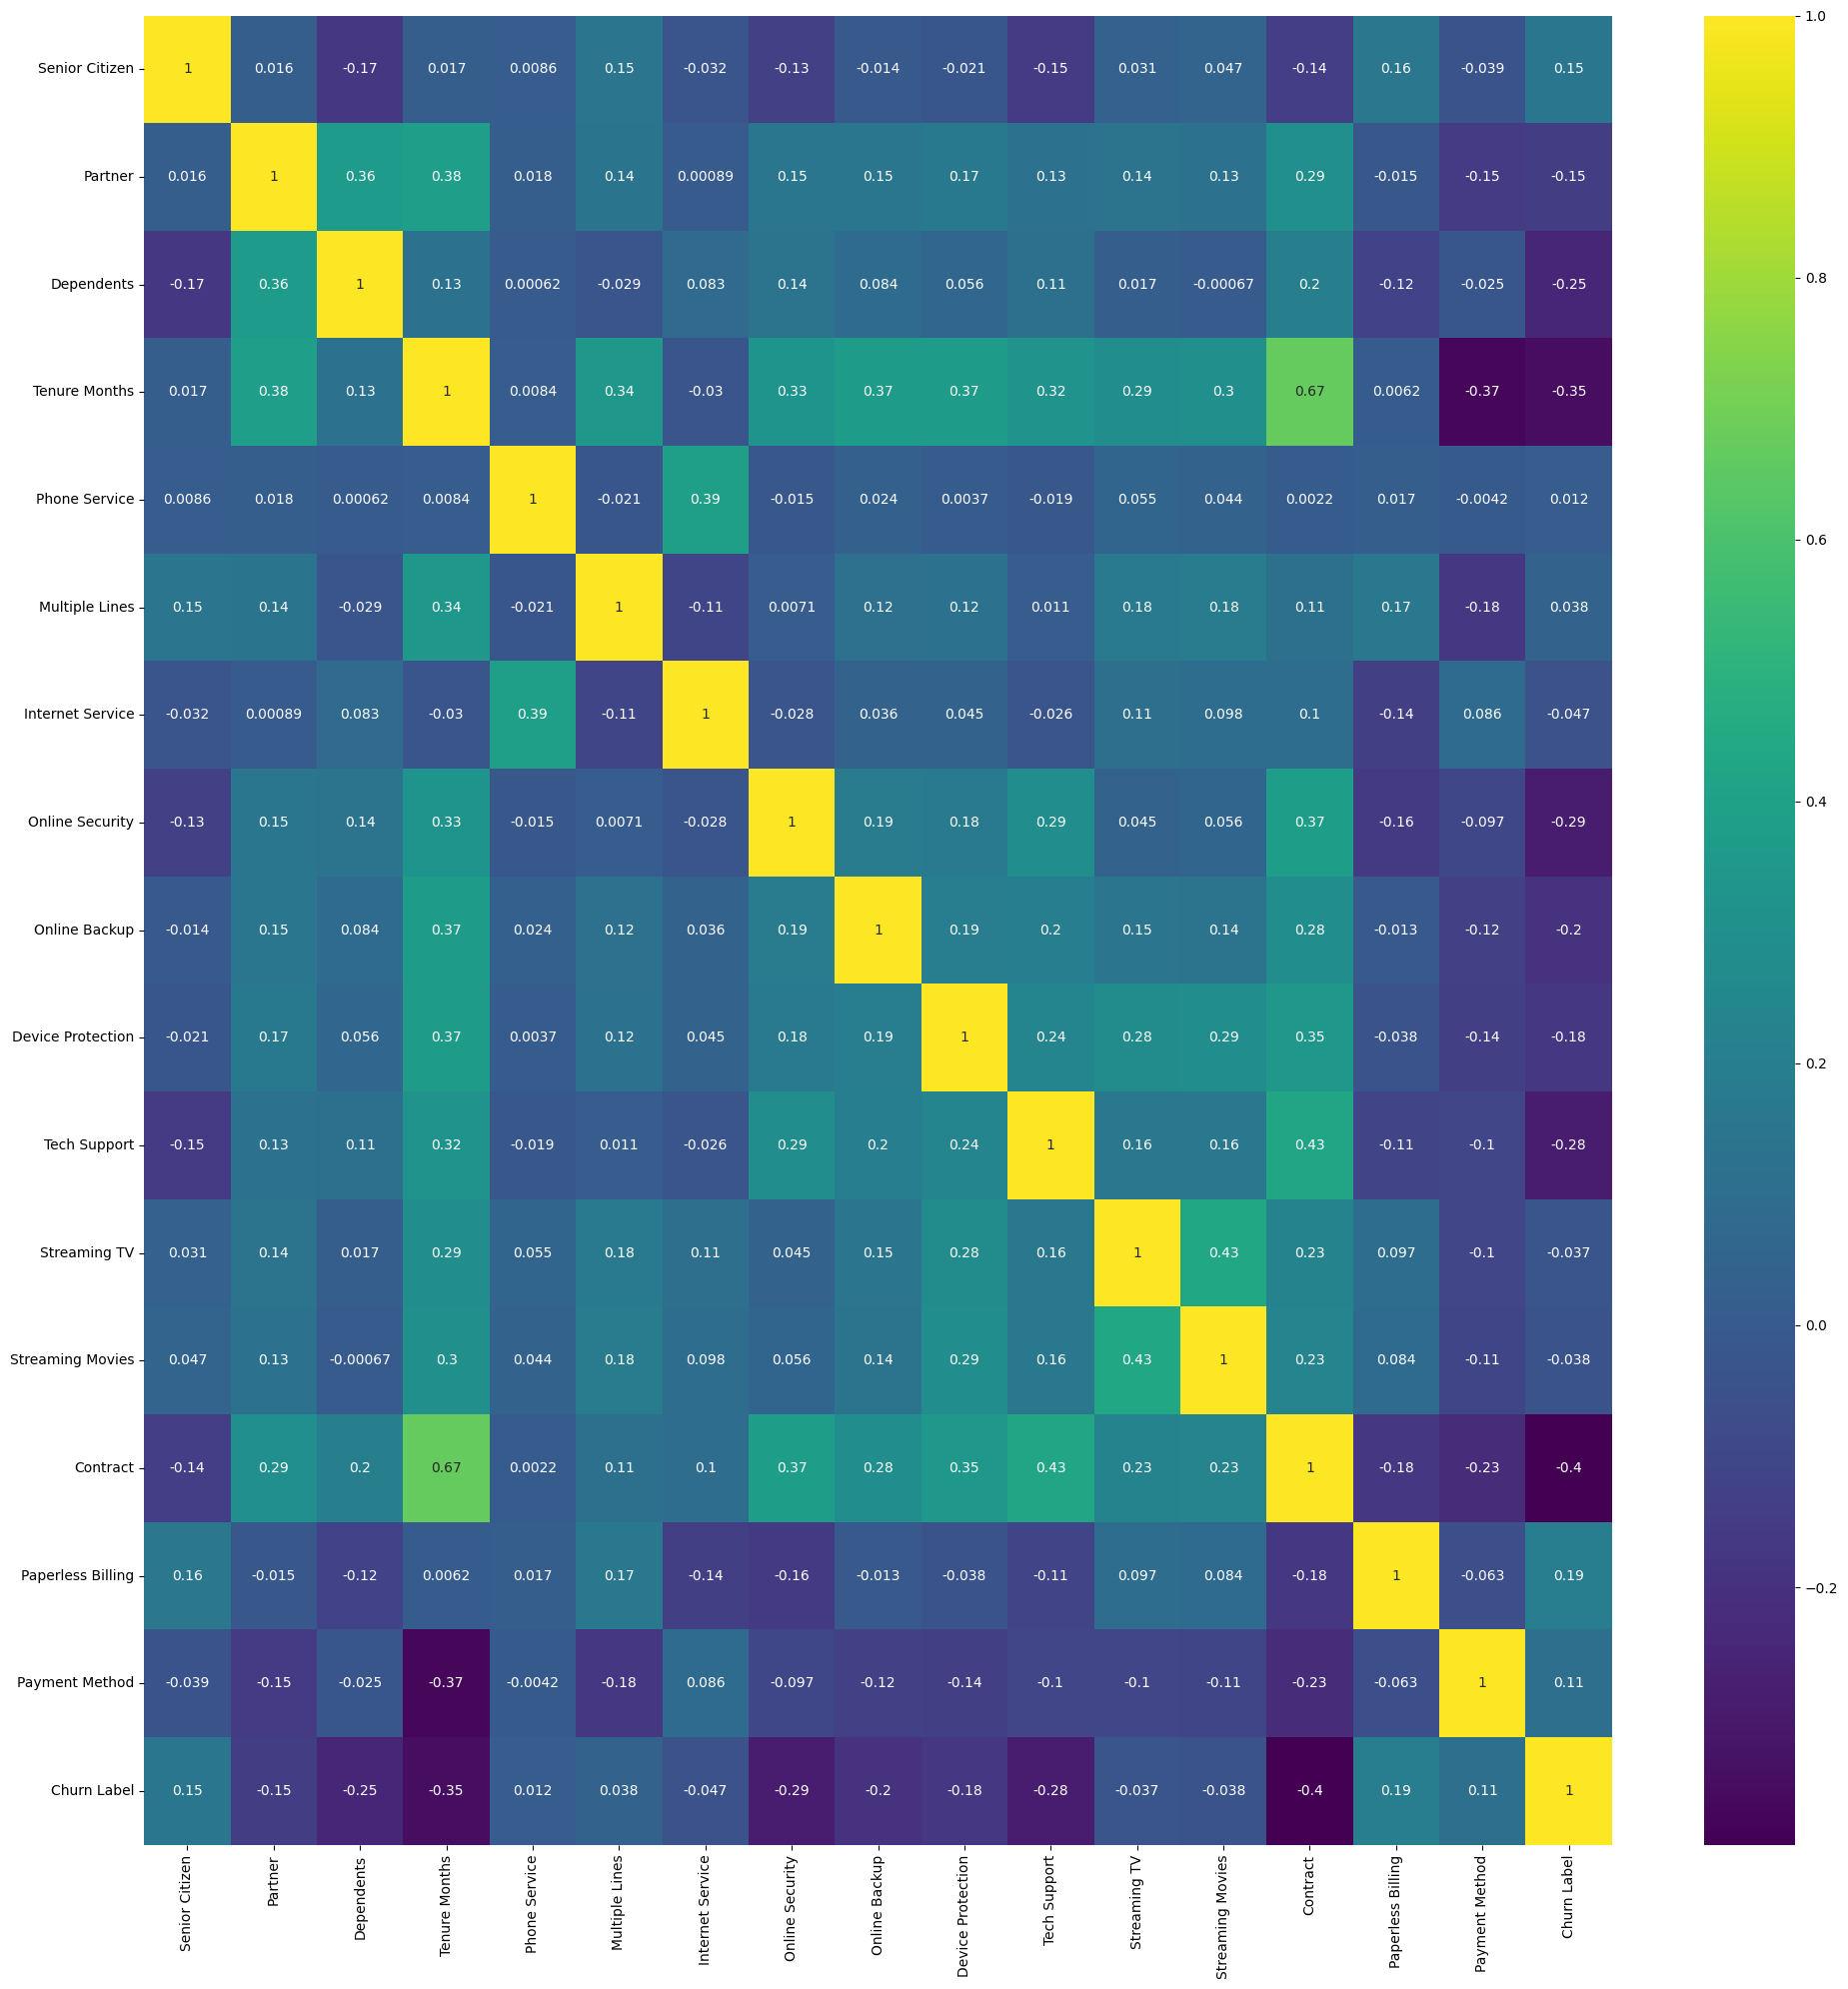

In [112]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.tight_layout()
plt.show()

### Potential Multicollinearity:
<ul>
<li> Streaming TV and Streaming Movies (0.43) </li>
<li> Tech Support and Contract(0.43) </li>
<li>Tech Support and Contract(0.43) </li>
<li>Contract and Tenure Months (0.67)</li>
</ul>

### Very Very Low or No Correlations with Churn Label:
Senior Citizen, Phone Service,Multiple Lines,Internet Service.

### Negative Correlations with Churn Label: 
<ul>
<li> Tenure Months(~-0.35)</li>
<li> Contract(-.4) </li>
<li>Tech Support(-.28)</li>
<li>Online Security(-.29)</li>
</ul>

In [113]:
df.drop(["Senior Citizen","Phone Service","Multiple Lines","Internet Service"],axis=1,inplace=True)

In [114]:
for item in ["Senior Citizen","Phone Service","Multiple Lines","Internet Service"]:
    selected_columns.remove(item)

<Figure size 4000x4000 with 0 Axes>

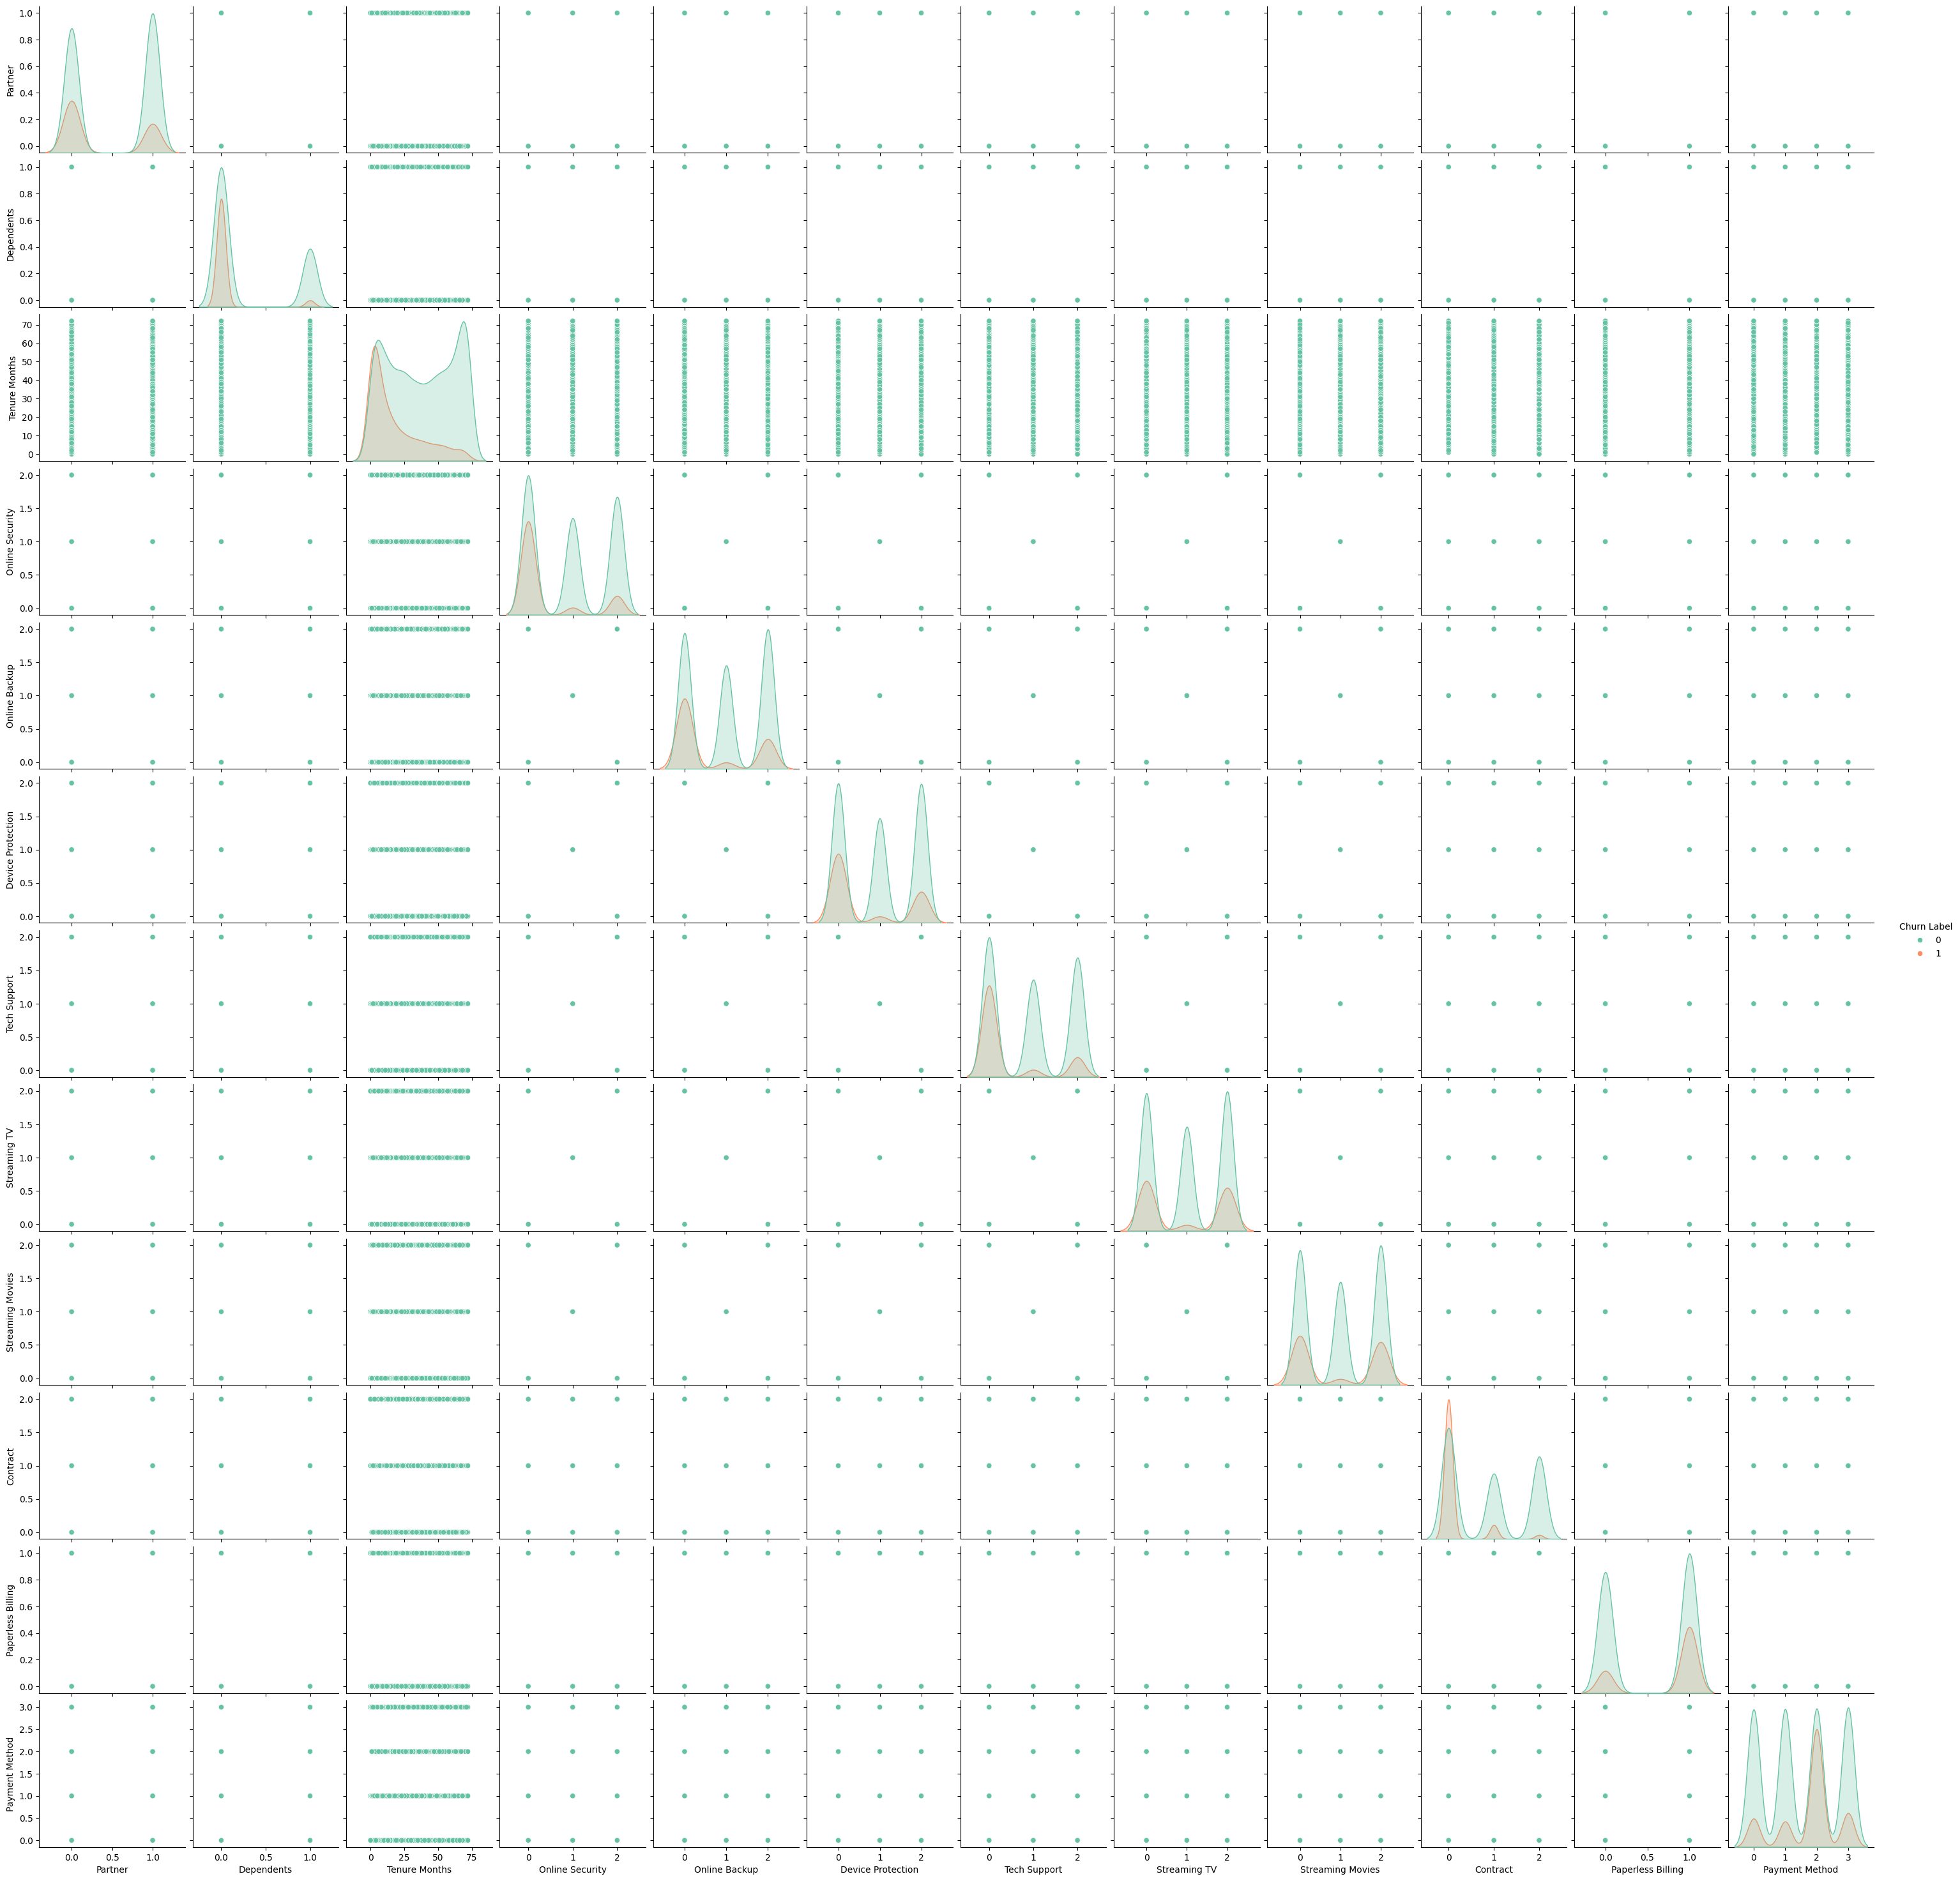

In [115]:
plt.figure(figsize=(40,40))
sns.pairplot(df[selected_columns], hue='Churn Label', diag_kind='kde', palette='Set2')
plt.show()